# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

# Loading 2021 dataset

In [2]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('Company_2021.csv')
data_2022_= pd.read_csv('Company_2022.csv')

# Loading 2022 dataset

In [3]:
data_2022_sp = data_2022_[['monthnum', 'year', 'cust id', 'units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']]
data_2022_trgt = data_2022_[['Customer_type']]

# Modeling with 2021 dataset & Evaluation with 2022 dataset

In [5]:
# Define the features (X) and target variable (y)
X = data[['monthnum', 'year', 'cust id', 'units', 'cost_per_unit', 'sales_cost', 'staff_qty', 'per_staff', 'staff_cost']]
y = data['Customer_type']  # Assuming 'Customer_Type' represents the customer types (1, 2, 3, 4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

best_classifier = None
best_accuracy = 0.0

# Store the metrics of all classifiers
metrics = {}

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions for 2022 data
    predictions_2022 = clf.predict(data_2022_sp)
    
    # Generate a classification report for precision, recall, and F1 score for each customer type
    report = classification_report(data_2022_trgt, predictions_2022, target_names=['Customer Type 1', 'Customer Type 2', 'Customer Type 3', 'Customer Type 4'], output_dict=True)
    
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())
    print("\n")

    # Calculate evaluation metrics for the model
    accuracy = accuracy_score(data_2022_trgt, predictions_2022)
    precision = precision_score(data_2022_trgt, predictions_2022, average='weighted')
    recall = recall_score(data_2022_trgt, predictions_2022, average='weighted')
    f1 = f1_score(data_2022_trgt, predictions_2022, average='weighted')
    
    # Store metrics in the dictionary
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Check if this classifier has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = clf

# Display the metrics of all classifiers
for name, metric in metrics.items():
    print(f"Classifier: {name}")
    print("Accuracy:", metric['Accuracy'])
    print("Precision:", metric['Precision'])
    print("Recall:", metric['Recall'])
    print("F1 Score:", metric['F1 Score'])
    print("\n")
    





Classifier: Random Forest
Classification Report:
                 precision    recall  f1-score    support
Customer Type 1   1.000000  1.000000  1.000000   8.000000
Customer Type 2   1.000000  0.185185  0.312500  27.000000
Customer Type 3   0.440000  1.000000  0.611111  22.000000
Customer Type 4   1.000000  0.666667  0.800000  18.000000
accuracy          0.626667  0.626667  0.626667   0.626667
macro avg         0.860000  0.712963  0.680903  75.000000
weighted avg      0.835733  0.626667  0.590426  75.000000


Classifier: Decision Tree
Classification Report:
                 precision    recall  f1-score    support
Customer Type 1   1.000000  1.000000  1.000000   8.000000
Customer Type 2   0.000000  0.000000  0.000000  27.000000
Customer Type 3   0.372881  1.000000  0.543210  22.000000
Customer Type 4   1.000000  0.444444  0.615385  18.000000
accuracy          0.506667  0.506667  0.506667   0.506667
macro avg         0.593220  0.611111  0.539649  75.000000
weighted avg      0.456045  0.

C:\Users\PTPL0125\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PTPL0125\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PTPL0125\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Classifier: K-Nearest Neighbors
Classification Report:
                 precision    recall  f1-score    support
Customer Type 1   1.000000  1.000000  1.000000   8.000000
Customer Type 2   1.000000  0.185185  0.312500  27.000000
Customer Type 3   0.440000  1.000000  0.611111  22.000000
Customer Type 4   1.000000  0.666667  0.800000  18.000000
accuracy          0.626667  0.626667  0.626667   0.626667
macro avg         0.860000  0.712963  0.680903  75.000000
weighted avg      0.835733  0.626667  0.590426  75.000000


Classifier: Logistic Regression
Classification Report:
                 precision    recall  f1-score    support
Customer Type 1   1.000000  1.000000  1.000000   8.000000
Customer Type 2   0.771429  1.000000  0.870968  27.000000
Customer Type 3   1.000000  0.636364  0.777778  22.000000
Customer Type 4   1.000000  1.000000  1.000000  18.000000
accuracy          0.893333  0.893333  0.893333   0.893333
macro avg         0.942857  0.909091  0.912186  75.000000
weighted avg      

C:\Users\PTPL0125\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Gradient Boosting
Classification Report:
                 precision    recall  f1-score    support
Customer Type 1   1.000000  1.000000  1.000000   8.000000
Customer Type 2   1.000000  0.185185  0.312500  27.000000
Customer Type 3   0.407407  1.000000  0.578947  22.000000
Customer Type 4   1.000000  0.444444  0.615385  18.000000
accuracy          0.573333  0.573333  0.573333   0.573333
macro avg         0.851852  0.657407  0.626708  75.000000
weighted avg      0.826173  0.573333  0.536684  75.000000


Classifier: Random Forest
Accuracy: 0.6266666666666667
Precision: 0.8357333333333333
Recall: 0.6266666666666667
F1 Score: 0.590425925925926


Classifier: Decision Tree
Accuracy: 0.5066666666666667
Precision: 0.45604519774011293
Recall: 0.5066666666666667
F1 Score: 0.4137005381449826


Classifier: SVM
Accuracy: 0.6266666666666667
Precision: 0.8357333333333333
Recall: 0.6266666666666667
F1 Score: 0.590425925925926


Classifier: K-Nearest Neighbors
Accuracy: 0.6266666666666667
Pr

# Save the best model

In [5]:
# Save the best classifier to a file (e.g., 'best_model.pkl')
import joblib
best_model_path = 'best_model.pkl'
joblib.dump(best_classifier, best_model_path)

print("Best Classifier:", type(best_classifier).__name__)
print("Accuracy of the Best Classifier on 2022 data:", best_accuracy)

# Concatenate data_2022_sp, data_2022_trgt, and predictions_2022 into one DataFrame
concatenated_data = pd.concat([data_2022_, pd.Series(predictions_2022, name='Predicted')], axis=1)

# Save the concatenated data to an Excel file
concatenated_data_excel_path = 'concatenated_data.csv'
concatenated_data.to_csv(concatenated_data_excel_path, index=False)

print(f"Concatenated data saved to '{concatenated_data_excel_path}'")

Best Classifier: LogisticRegression
Accuracy of the Best Classifier on 2022 data: 0.8933333333333333
Concatenated data saved to 'concatenated_data.csv'


In [6]:
data_2022 = pd.read_csv('concatenated_data.csv')
data_2022

,monthnum,month,year,categories,description,cust id,region,units,cost_per_unit,sales_cost,staff_qty,per_staff,staff_cost,Customer_type,Predicted
0,1,January,2022,Low pressure compressors,These compressors are designed for application...,1101,Middle east,15,25000,375000,28,225,6300,1,1
1,2,February,2022,Gas compressors,ELGi also provides gas compressors for compres...,1101,Southeast asia,25,28000,700000,32,250,8000,2,3
2,3,March,2022,Compressed air system,ELGi offers complete compressed air solutions...,1101,Africa,27,30000,810000,36,275,9900,3,3
3,4,April,2022,Reciprocating compressors,These are positive displacement compressors th...,1101,Australia,38,45000,1710000,4,75,300,4,3
4,5,May,2022,Rotary screw compressors,Rotary screw compressors use a pair of interlo...,1101,South America,21,25000,525000,8,100,800,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,11,November,2022,Customized solutions,ELGi can also provide customized compressor so...,1111,USA,22,35000,770000,40,300,12000,3,3
71,7,July,2022,Oil free compressors,ELGi offers oil-free compressors that are desi...,1112,USA,55,35000,1925000,12,125,1500,4,4
72,8,August,2022,Centrifugal compressors,Centrifugal compressors use a rotating impelle...,1112,South America,21,35000,735000,16,150,2400,2,3
73,9,September,2022,High-pressure compressors,ELGi manufactures high-pressure compressors ca...,1112,China,24,34000,816000,20,175,3500,3,3


# Plot the actual vs predicted data

C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\2498512456.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='Customer_type', data=data_2022, ax=axes[0], ci=None, order=month_order, color='orange', label='Actual')
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\2498512456.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='Predicted', data=data_2022, ax=axes[0], ci=None, alpha=0.5, order=month_order, color='yellow', label='Predicted')
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\2498512456.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='Customer_type', data=data_2022, ax=axes[1], ci=None, order=region_order, color='orange', label='Actual')
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\2498512456.py:21: FutureWarning: 

The `c

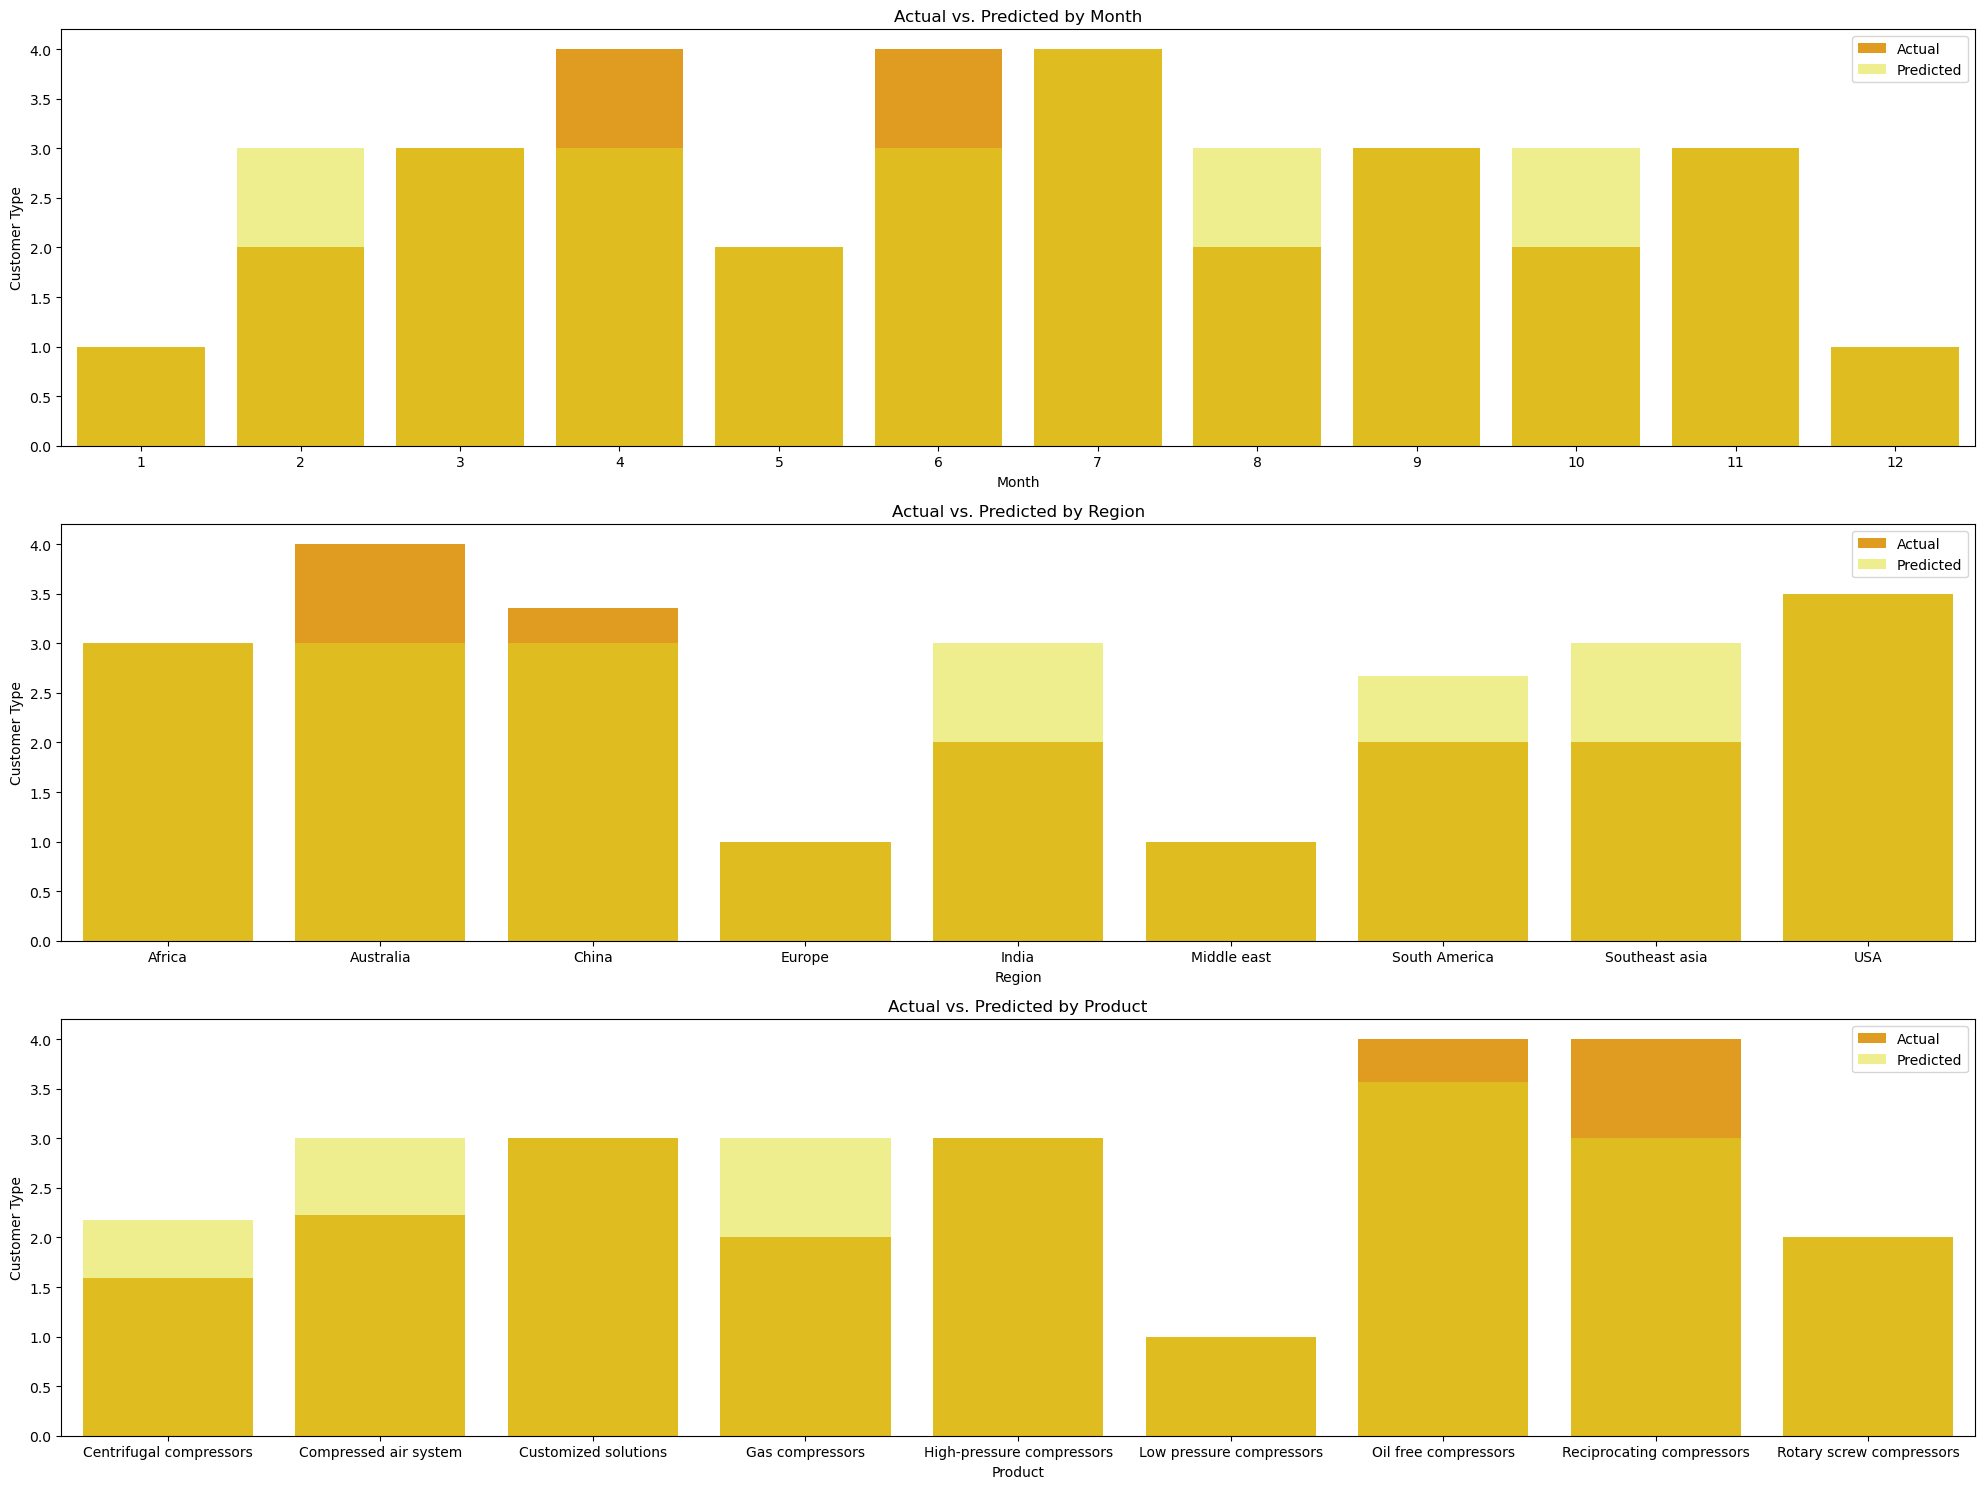

In [7]:

# Assuming you have data_2022 containing 'monthnum', 'region', 'categories', 'Customer_type', and 'Predicted' columns

# Create subplots for 'monthnum,' 'region,' and 'product'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))  # Adjust figsize as needed

# Define the order of categories for 'monthnum,' 'region,' and 'product'
month_order = sorted(data_2022['monthnum'].unique())
region_order = sorted(data_2022['region'].unique())
product_order = sorted(data_2022['categories'].unique())

# Subplot 1: 'monthnum'
sns.barplot(x='monthnum', y='Customer_type', data=data_2022, ax=axes[0], ci=None, order=month_order, color='orange', label='Actual')
sns.barplot(x='monthnum', y='Predicted', data=data_2022, ax=axes[0], ci=None, alpha=0.5, order=month_order, color='yellow', label='Predicted')
axes[0].set_title('Actual vs. Predicted by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Customer Type')
axes[0].legend()

# Subplot 2: 'region'
sns.barplot(x='region', y='Customer_type', data=data_2022, ax=axes[1], ci=None, order=region_order, color='orange', label='Actual')
sns.barplot(x='region', y='Predicted', data=data_2022, ax=axes[1], ci=None, alpha=0.5, order=region_order, color='yellow', label='Predicted')
axes[1].set_title('Actual vs. Predicted by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Customer Type')
axes[1].legend()

# Subplot 3: 'product'
sns.barplot(x='categories', y='Customer_type', data=data_2022, ax=axes[2], ci=None, order=product_order, color='orange', label='Actual')
sns.barplot(x='categories', y='Predicted', data=data_2022, ax=axes[2], ci=None, alpha=0.5, order=product_order, color='yellow', label='Predicted')
axes[2].set_title('Actual vs. Predicted by Product')
axes[2].set_xlabel('Product')
axes[2].set_ylabel('Customer Type')
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Save the plot if needed
plt.savefig('actual_vs_predicted_clustered_bar_chart.png')

# Show the plot
plt.show()


# Plot the staff utilization

C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\1473940081.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2021], ax=axes[0, 0], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\1473940081.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2022], ax=axes[0, 1], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\1473940081.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2021], ax=axes[1, 0], ci=None)
C:\Users\PTPL0125\AppData\Local\Temp\ipykernel_20252\1473940081.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthnum', y='staff_cost', 

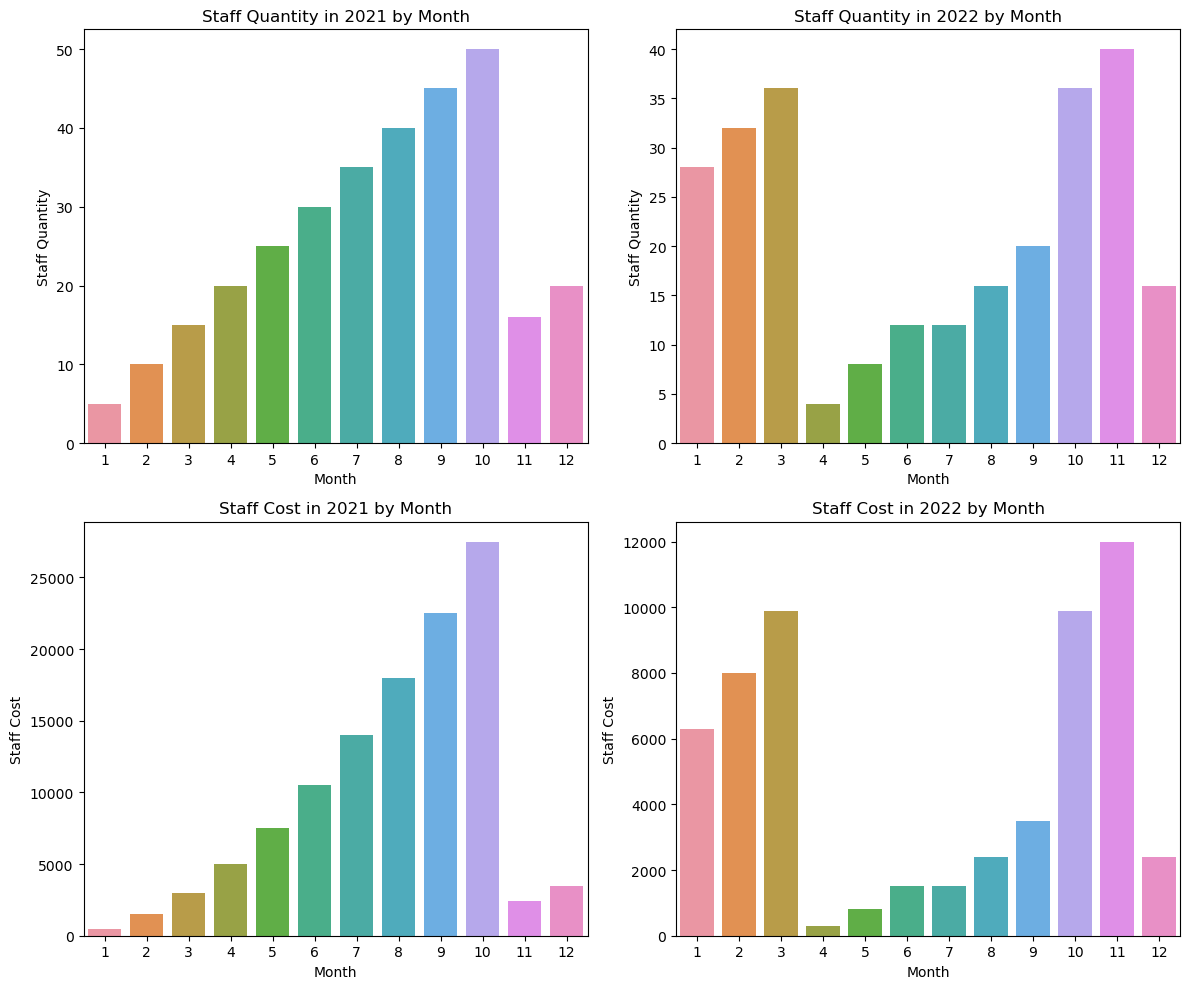

In [8]:
data = pd.read_excel('Company.xlsx')

# Create subplots for 'staff_qty' and 'staff_cost' by month for 2021 and 2022
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust figsize as needed

# Subplot 1: 'staff_qty' for 2021
sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2021], ax=axes[0, 0], ci=None)
axes[0, 0].set_title('Staff Quantity in 2021 by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Staff Quantity')

# Subplot 2: 'staff_qty' for 2022
sns.barplot(x='monthnum', y='staff_qty', data=data[data['year'] == 2022], ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Staff Quantity in 2022 by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Staff Quantity')

# Subplot 3: 'staff_cost' for 2021
sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2021], ax=axes[1, 0], ci=None)
axes[1, 0].set_title('Staff Cost in 2021 by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Staff Cost')

# Subplot 4: 'staff_cost' for 2022
sns.barplot(x='monthnum', y='staff_cost', data=data[data['year'] == 2022], ax=axes[1, 1], ci=None)
axes[1, 1].set_title('Staff Cost in 2022 by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Staff Cost')

# Adjust layout
plt.tight_layout()

# Save the plot if needed
plt.savefig('staff_qty_and_cost_by_month.png')

# Show the plot
plt.show()
